# **IMPORT**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Imbalanced Learning Libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# XGBoost
import xgboost as xgb

In [3]:
data = pd.read_csv('diabetes_dataset.csv')
df = pd.DataFrame(data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238290 entries, 0 to 1238289
Data columns (total 17 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   DiabetesOutput           1238290 non-null  float64
 1   HighBloodPressure        1238290 non-null  int64  
 2   HighCholesterol          1238290 non-null  float64
 3   CholesterolCheck         1238290 non-null  int64  
 4   BMI                      1238290 non-null  float64
 5   Smoker                   1238290 non-null  float64
 6   Stroke                   1238290 non-null  float64
 7   HeartDiseaseorAttack     1238290 non-null  float64
 8   PhysicalActivity         1238290 non-null  int64  
 9   HeavyAlcoholConsumption  1238290 non-null  int64  
 10  AnyHealthcare            1238290 non-null  float64
 11  GeneralHealth            1238290 non-null  float64
 12  MentalHealth             1238290 non-null  float64
 13  PhysicalHealth           1238290 non-null 

# **Scanning The Data**

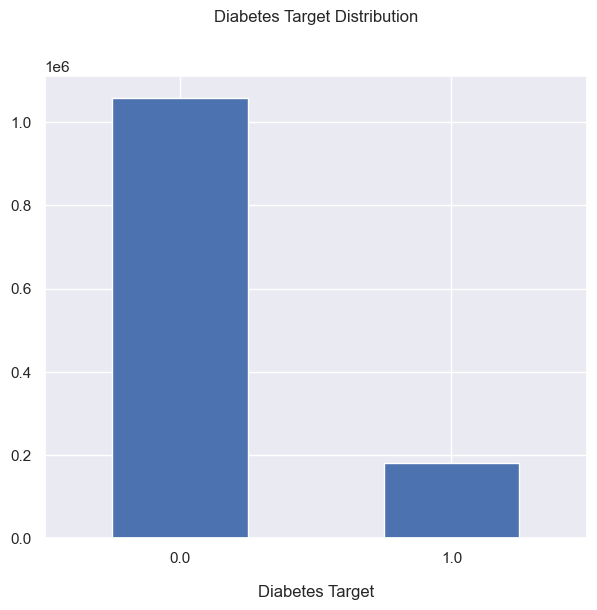

DiabetesOutput
0.0    1057172
1.0     181118
Name: count, dtype: int64


In [4]:
sns.set_theme(font_scale=1.0)
df['DiabetesOutput'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Diabetes Target", labelpad=14)
plt.title("Diabetes Target Distribution", y=1.1);
plt.show()

print(df['DiabetesOutput'].value_counts())

## Checking Missing Value and Removing Duplicate Rows

In [5]:
df.isnull().sum()

DiabetesOutput             0
HighBloodPressure          0
HighCholesterol            0
CholesterolCheck           0
BMI                        0
Smoker                     0
Stroke                     0
HeartDiseaseorAttack       0
PhysicalActivity           0
HeavyAlcoholConsumption    0
AnyHealthcare              0
GeneralHealth              0
MentalHealth               0
PhysicalHealth             0
DifficultyWalking          0
Sex                        0
Age                        0
dtype: int64

In [6]:
duplicate_rows = df.duplicated()
print("All Duplicate Rows:")
df[df.duplicated(keep=False)]

All Duplicate Rows:


,DiabetesOutput,HighBloodPressure,HighCholesterol,CholesterolCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysicalActivity,HeavyAlcoholConsumption,AnyHealthcare,GeneralHealth,MentalHealth,PhysicalHealth,DifficultyWalking,Sex,Age
0,1.0,1,1.0,1,27.0,0.0,0.0,0.0,1,0,1.0,2.0,0.0,0.0,1.0,0,11
1,0.0,1,0.0,1,29.0,0.0,0.0,0.0,1,0,1.0,2.0,0.0,0.0,0.0,1,10
2,0.0,0,1.0,1,25.0,0.0,0.0,0.0,2,0,1.0,3.0,0.0,0.0,0.0,1,11
6,0.0,0,0.0,1,28.0,0.0,0.0,0.0,2,0,1.0,3.0,0.0,0.0,0.0,1,10
9,0.0,1,1.0,1,24.0,0.0,0.0,0.0,2,0,1.0,3.0,0.0,0.0,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238283,0.0,1,1.0,1,31.0,0.0,0.0,0.0,1,0,1.0,3.0,0.0,0.0,0.0,1,11
1238284,0.0,0,0.0,1,27.0,0.0,0.0,0.0,1,0,1.0,3.0,2.0,0.0,0.0,0,8
1238285,1.0,1,1.0,1,26.0,0.0,0.0,0.0,1,0,1.0,3.0,0.0,0.0,0.0,0,11
1238287,0.0,0,0.0,1,25.0,0.0,0.0,0.0,2,0,1.0,2.0,0.0,0.0,0.0,0,3


In [7]:
dataClean = df.drop_duplicates()
print("All Duplicate Rows:")
dataClean[dataClean.duplicated(keep=False)]

All Duplicate Rows:


,DiabetesOutput,HighBloodPressure,HighCholesterol,CholesterolCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysicalActivity,HeavyAlcoholConsumption,AnyHealthcare,GeneralHealth,MentalHealth,PhysicalHealth,DifficultyWalking,Sex,Age


In [8]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540529 entries, 0 to 1238288
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DiabetesOutput           540529 non-null  float64
 1   HighBloodPressure        540529 non-null  int64  
 2   HighCholesterol          540529 non-null  float64
 3   CholesterolCheck         540529 non-null  int64  
 4   BMI                      540529 non-null  float64
 5   Smoker                   540529 non-null  float64
 6   Stroke                   540529 non-null  float64
 7   HeartDiseaseorAttack     540529 non-null  float64
 8   PhysicalActivity         540529 non-null  int64  
 9   HeavyAlcoholConsumption  540529 non-null  int64  
 10  AnyHealthcare            540529 non-null  float64
 11  GeneralHealth            540529 non-null  float64
 12  MentalHealth             540529 non-null  float64
 13  PhysicalHealth           540529 non-null  float64
 14  Difficul

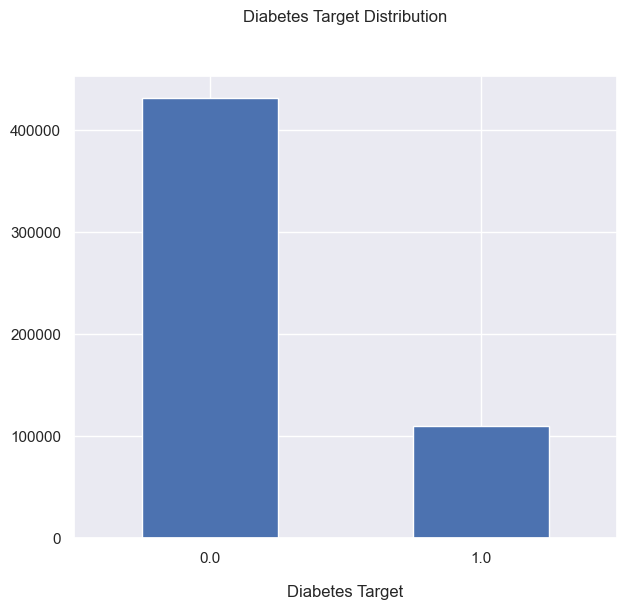

DiabetesOutput
0.0    430972
1.0    109557
Name: count, dtype: int64


In [9]:
sns.set_theme(font_scale=1.0)
dataClean['DiabetesOutput'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Diabetes Target", labelpad=14)
plt.title("Diabetes Target Distribution", y=1.1);
plt.show()

print(dataClean['DiabetesOutput'].value_counts())

# **Data Balancing**

In [10]:
X = dataClean.drop(['DiabetesOutput'], axis = 1).values
y = dataClean['DiabetesOutput']

## Over-Sampling SMOTE

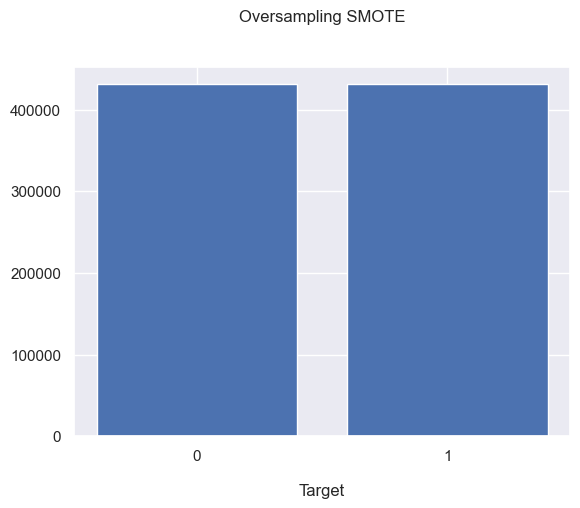

DiabetesOutput
1.0    430972
0.0    430972
Name: count, dtype: int64

In [11]:
# SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X, y)

# Oversampling SMOTE
sns.set_theme(font_scale=1.0)
smote_counts = y_resampled_smote.value_counts()

plt.bar(smote_counts.index, smote_counts.values)
plt.xlabel("Target", labelpad=14)
plt.xticks([0, 1])
plt.title("Oversampling SMOTE", y=1.1);
plt.show()

smote_counts

## Under-Sampling RandomUnderSampler

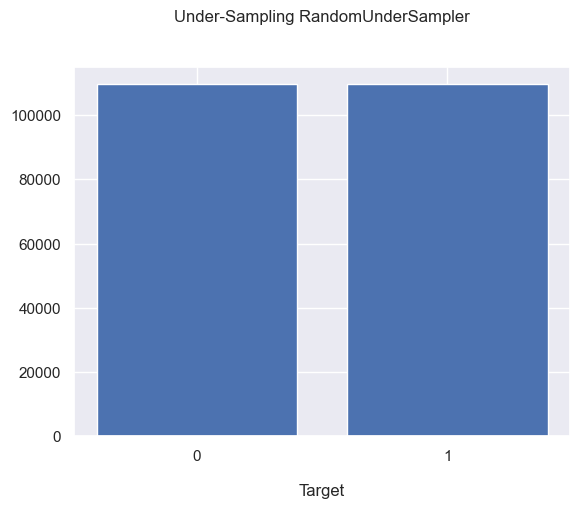

DiabetesOutput
0.0    109557
1.0    109557
Name: count, dtype: int64

In [12]:
# RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)

# Under-Sampling RandomUnderSampler
sns.set_theme(font_scale=1.0)
rus_counts = y_resampled_rus.value_counts()

plt.bar(rus_counts.index, rus_counts.values)
plt.xlabel("Target", labelpad=14)
plt.xticks([0, 1])
plt.title("Under-Sampling RandomUnderSampler", y=1.1);
plt.show()

rus_counts

## Over- and Under-Sampling SMOTEENN

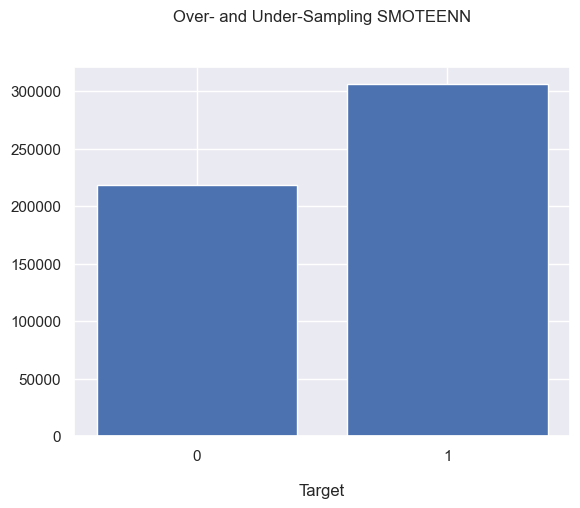

DiabetesOutput
1.0    306179
0.0    218410
Name: count, dtype: int64

In [13]:
# SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled_smoteenn, y_resampled_smoteenn = smoteenn.fit_resample(X, y)

# Over- and Under-Sampling SMOTEENN
sns.set_theme(font_scale=1.0)
smoteenn_counts = y_resampled_smoteenn.value_counts()

plt.bar(smoteenn_counts.index, smoteenn_counts.values)
plt.xlabel("Target", labelpad=14)
plt.xticks([0, 1])
plt.title("Over- and Under-Sampling SMOTEENN", y=1.1);
plt.show()

smoteenn_counts

## Comparing Sampling Model

In [14]:
#Data Raw
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Oversampling SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)
len(X_train_smote), len(X_test_smote), len(y_train_smote), len(y_test_smote)

model_smote = xgb.XGBClassifier()
model_smote.fit(X_train_smote, y_train_smote)

# Under-Sampling RandomUnderSampler
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_resampled_rus, y_resampled_rus, test_size=0.2, random_state=42)
len(X_train_rus), len(X_test_rus), len(y_train_rus), len(y_test_rus)

model_rus = xgb.XGBClassifier()
model_rus.fit(X_train_rus, y_train_rus)

# Over- and Under-Sampling SMOTEENN
X_train_smoteenn, X_test_smoteenn, y_train_smoteenn, y_test_smoteenn = train_test_split(X_resampled_smoteenn, y_resampled_smoteenn, test_size=0.2, random_state=42)
len(X_train_smoteenn), len(X_test_smoteenn), len(y_train_smoteenn), len(y_test_smoteenn)

model_smoteenn = xgb.XGBClassifier()
model_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

print("Success")

Success


In [15]:
# Raw Data
y_test_pred = model.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred))

accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nTest Set Accuracy:", accuracy_test)


Test Set:
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89     86172
         1.0       0.57      0.19      0.28     21934

    accuracy                           0.81    108106
   macro avg       0.69      0.58      0.59    108106
weighted avg       0.77      0.81      0.77    108106


Test Set Accuracy: 0.806051468003626


In [16]:
# Over-Sampling SMOTE
y_test_pred_smote = model_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_smote))

accuracy_test_smote = accuracy_score(y_test_smote, y_test_pred_smote)

print("\nTest Set Accuracy:", accuracy_test_smote)


Test Set:
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87     86281
         1.0       0.92      0.80      0.86     86108

    accuracy                           0.87    172389
   macro avg       0.87      0.87      0.87    172389
weighted avg       0.87      0.87      0.87    172389


Test Set Accuracy: 0.8664241917987807


In [17]:
# Under-Sampling RandomUnderSampler
y_test_pred_rus = model_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_rus))

accuracy_test_rus = accuracy_score(y_test_rus, y_test_pred_rus)

print("\nTest Set Accuracy:", accuracy_test_rus)


Test Set:
              precision    recall  f1-score   support

         0.0       0.76      0.66      0.71     21856
         1.0       0.70      0.79      0.74     21967

    accuracy                           0.73     43823
   macro avg       0.73      0.73      0.72     43823
weighted avg       0.73      0.73      0.72     43823


Test Set Accuracy: 0.7251671496702645


In [18]:
# Over and Under-Sampling SMOTEENN
y_test_pred_smoteenn = model_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_smoteenn))

accuracy_test_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_smoteenn)

print("\nTest Set Accuracy:", accuracy_test_smoteenn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91     43640
         1.0       0.94      0.93      0.93     61278

    accuracy                           0.92    104918
   macro avg       0.92      0.92      0.92    104918
weighted avg       0.92      0.92      0.92    104918


Test Set Accuracy: 0.92405497626718


C:\Users\Darren\AppData\Local\Temp\ipykernel_24116\2981312884.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_comp['Sampling Technique'], rotation=45, ha='right')


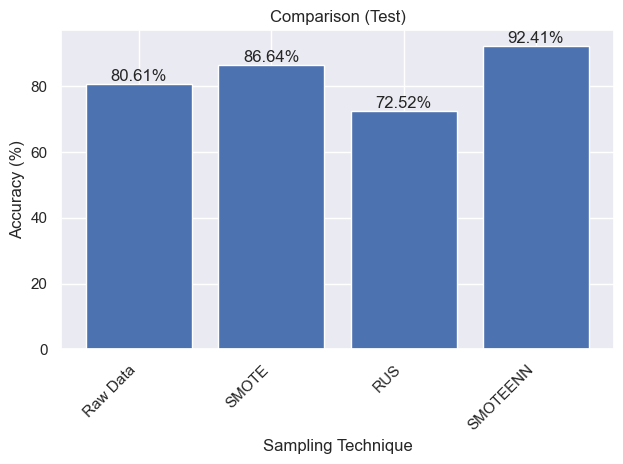

In [19]:
model_comp = pd.DataFrame({'Sampling Technique': ['Raw Data', 'SMOTE', 'RUS', 'SMOTEENN'], 'Accuracy': [accuracy_test*100, accuracy_test_smote*100, accuracy_test_rus*100, accuracy_test_smoteenn*100]})

fig, ax = plt.subplots()
bars = ax.bar(model_comp['Sampling Technique'], model_comp['Accuracy'])

ax.set_xlabel('Sampling Technique')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparison (Test)')
ax.set_xticklabels(model_comp['Sampling Technique'], rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **Training Predictive Model**

In [142]:
X_train = X_resampled_smoteenn
y_train = y_resampled_smoteenn

test_data = pd.read_csv('test_data.csv')

X_test = test_data.drop(['DiabetesOutput'], axis = 1).values
y_test = test_data['DiabetesOutput']

## Decision Tree

In [148]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("\nClassification Report:\n")
print(report)

Accuracy: 91.20%

Classification Report:

              precision    recall  f1-score   support

          No       0.90      0.92      0.91    250000
         Yes       0.92      0.90      0.91    250000

    accuracy                           0.91    500000
   macro avg       0.91      0.91      0.91    500000
weighted avg       0.91      0.91      0.91    500000



## Random Forest

In [144]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("\nClassification Report:\n")
print(report)

Accuracy: 94.97%

Classification Report:

              precision    recall  f1-score   support

          No       0.96      0.94      0.95    250000
         Yes       0.94      0.96      0.95    250000

    accuracy                           0.95    500000
   macro avg       0.95      0.95      0.95    500000
weighted avg       0.95      0.95      0.95    500000



## Logistic Regression

In [145]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("\nClassification Report:\n")
print(report)

Accuracy: 88.12%

Classification Report:

              precision    recall  f1-score   support

          No       0.90      0.86      0.88    250000
         Yes       0.87      0.90      0.88    250000

    accuracy                           0.88    500000
   macro avg       0.88      0.88      0.88    500000
weighted avg       0.88      0.88      0.88    500000



## Extra Trees Classifier

Accuracy: 95.09%

Classification Report:

              precision    recall  f1-score   support

          No       0.96      0.94      0.95    250000
         Yes       0.94      0.96      0.95    250000

    accuracy                           0.95    500000
   macro avg       0.95      0.95      0.95    500000
weighted avg       0.95      0.95      0.95    500000



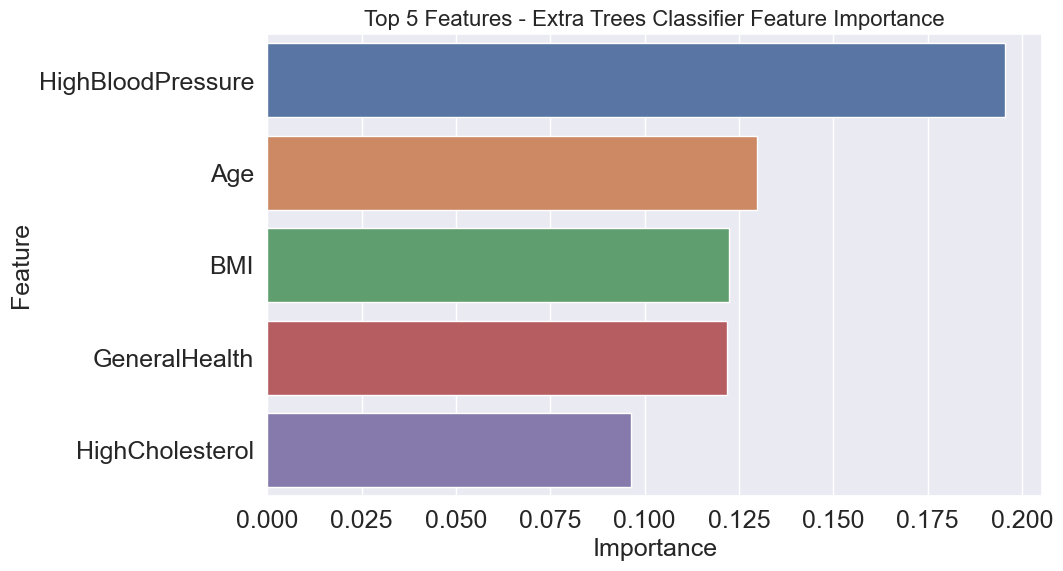

In [150]:
clf = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("\nClassification Report:\n")
print(report)

importances = clf.feature_importances_

feature_names = [
    'HighBloodPressure', 'HighCholesterol', 'CholesterolCheck', 'BMI', 'Smoker', 
    'Stroke', 'HeartDiseaseorAttack', 'PhysicalActivity', 'HeavyAlcoholConsumption', 
    'AnyHealthcare', 'GeneralHealth', 'MentalHealth', 'PhysicalHealth', 
    'DifficultyWalking', 'Sex', 'Age'
]

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, hue='Feature') 

plt.title("Top 5 Features - Extra Trees Classifier Feature Importance", fontsize=16)
plt.xlabel("Importance", fontsize=18)
plt.ylabel("Feature", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

## XGBoost

In [147]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 88.16%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89    250000
         1.0       0.92      0.84      0.88    250000

    accuracy                           0.88    500000
   macro avg       0.88      0.88      0.88    500000
weighted avg       0.88      0.88      0.88    500000

